# Non-synapse-specific increases in history-dependent excitability endow a simplified neural network model with the capacity for short-term memory and one-shot learning
### Motivation
Spontaneous activity in neuronal networks exhibits rich spatiotemporal structure ([Mohajerani et al., 2013][1]), and these "priors" influence the representation of sensory stimuli. For example, [Carrillo-Reid et al., 2015][2] showed that evoked network activity in mouse V1 recruits cell ensembles identified during immediately preceding spontaneous activity. Additionally, Conversely, there is evidence that the spontaneous activity distribution is itself influenced by sensory-evoked activity patterns that have occurred in the recent past. The most convincing evidence of this is *replay*, a phenomenon observed in many brain areas in which a spatiotemporal activity pattern witnessed during sensory-evoked activity reappears a short time afterwards, either completely spontaneously ([Han et al., 2008][3]) or when triggered by the first "frame" of the original sensory stimulus ([Eagleman and Dragoi, 2012][4]). Such an influence of evoked activity on immediately subsequent spontaneous activity may play an important role in learning and memory, especially in the context of learning with few training examples, i.e., "one-shot learning". The biophysical network mechanisms that might underlie this phenomenon, however, remain poorly understood. 

In this investigation I explore a simple neural network model containing a prior distribution over activity patterns embedded via its connectivity matrix. I show how the prior distribution influences the representation of sensory stimuli, as well as how replay can occur if one allows individual nodes in the network to transiently increase their excitability following recent activation. I discuss potential biophysical underpinnings later on. Finally, I show how replay via such history-dependent excitability increases can lead to long-term learning of representations of novel stimuli, even when those stimuli are presented only once to the network.

In doing all this I hope to also gain insight into how the structure of the *prior* distribution over network activity influences and constrains the representation, recall, and transference into long-term memory of novel stimulus patterns.

### The network model
To explore the above questions in the simplest way, I consider a network of non-overlapping "synfire chains" ([Ikegaya et al., 2004][5]), as shown below. Nodes in this network refer to populations of neurons activatable by different sensory inputs. The color of each node indicates which chain it is in, the number, which position it has in the chain.
<img src="files/softmax_chains_basic.png" width="500" />
The dynamics follow a winner-take-all mechanism ([Lee, et al.][6]), implemented via the softmax function. That is, the probability of node $cj$ activating at a given timestep is equal to:

$$p(cj) \propto \exp[gs_{cj}]$$

where $s_{cj}$ is the total input into node $cj$, and $g$ is a gain term. The higher the gain-term the lower the entropy of the distribution and the more deterministic the firing patterns. 

Since only one node in the whole network is active at any given time, the vector $\mathbf{r}$ of "firing rates" is at all times all zeros except at the index of the active node, where it is 1. The general idea is to normalize activity to keep total activation from ever reaching too high a level. Biologically, this could be implemented in some form or another through inhibitory mechanisms.

At this point, we allow a node to receive two kinds of inputs: upstream inputs (from previous nodes in the chain) or external drive inputs. The upstream inputs we calculate via a connectivity matrix: $\mathbf{s}_{upstream} = W\mathbf{r}$, where $W_{kl}$ is the synaptic weight from neuron $k$ to neuron $l$. Here, $W_{kl} = w_{strong}$ whenever node $k$ follows node $l$ in a chain, with $W_{kl} = 0$ otherwise. Clearly, such a weight network gives strong prior probabilities to the activation of sequential nodes in a given chain.

[1]: http://www.nature.com/neuro/journal/v16/n10/full/nn.3499.html
[2]: http://www.jneurosci.org/content/35/23/8813.full
[3]: http://www.cell.com/abstract/S0896-6273(08)00767-8
[4]: http://www.pnas.org/content/109/47/19450.full.pdf
[5]: http://www.ncbi.nlm.nih.gov/pubmed/15105494
[6]: http://www.ncbi.nlm.nih.gov/pubmed/15105494

# Simulations
Some basic simulations of the model in action are shown below.

# Interpreting figures (read this before looking at the pictures!)
In all the figures that follow, each column is a trial. Time is on the x-axis. Each color indicates a specific chain, and each row indicates a position in the chain. For example, if node (red-3) i.e., node 3 in the red chain is active at time 2 in trial 1, the figure will show a red peak in row 3 in column 1 at time 2. This representation makes it easy to visualize sequential activation of nodes in the same chain.

In [1]:
%matplotlib inline
import softmax_chains_spontaneous_and_driven

### Spontaneous activity
When the network is spontaneously active, one sees parts of individual chains sequentially activate, i.e., these are spontaenously active prior patterns. When the end of a chain is reached, a new starting node is chosen completely at random, since all inputs are equal. Some example trials of spontaneous activity are shown below.

In [2]:
CONFIG_SPONTANEOUS = {
    'SEED': None,  # FOR THE RANDOM NUMBER GENERATOR
    
    'N_CHAINS': 9,  # HOW MANY CHAINS IN THE NETWORK
    'CHAIN_LENGTH': 7,  # HOW MANY NODES IN EACH CHAIN
    
    'W_STRONG': 2,  # WEIGHT OF CONNECTIONS BETWEEN SUCCESSIVE NODES IN A CHAIN
    
    'GAIN': 6,  # GAIN TERM FOR WINNER-TAKE-ALL MECHANISM
    
    'TRIAL_DURATION': 7,  # HOW MANY TIMESTEPS PER TRIAL
    'N_TRIALS': 6,  # HOW MANY TRIALS
    
    'FIG_SIZE': (15, 12),
    'COLORS': [
            (0, 0, 0), (1, 0, 0), (0, 1, 0), (0, 0, 1), (0, 1, 1),
            (1, 0, 1), (.5, .5, 0), (.5, .5, .5), (.5, 0, 0)
        ],
    'LW': 2,
    'FONT_SIZE': 16,
}

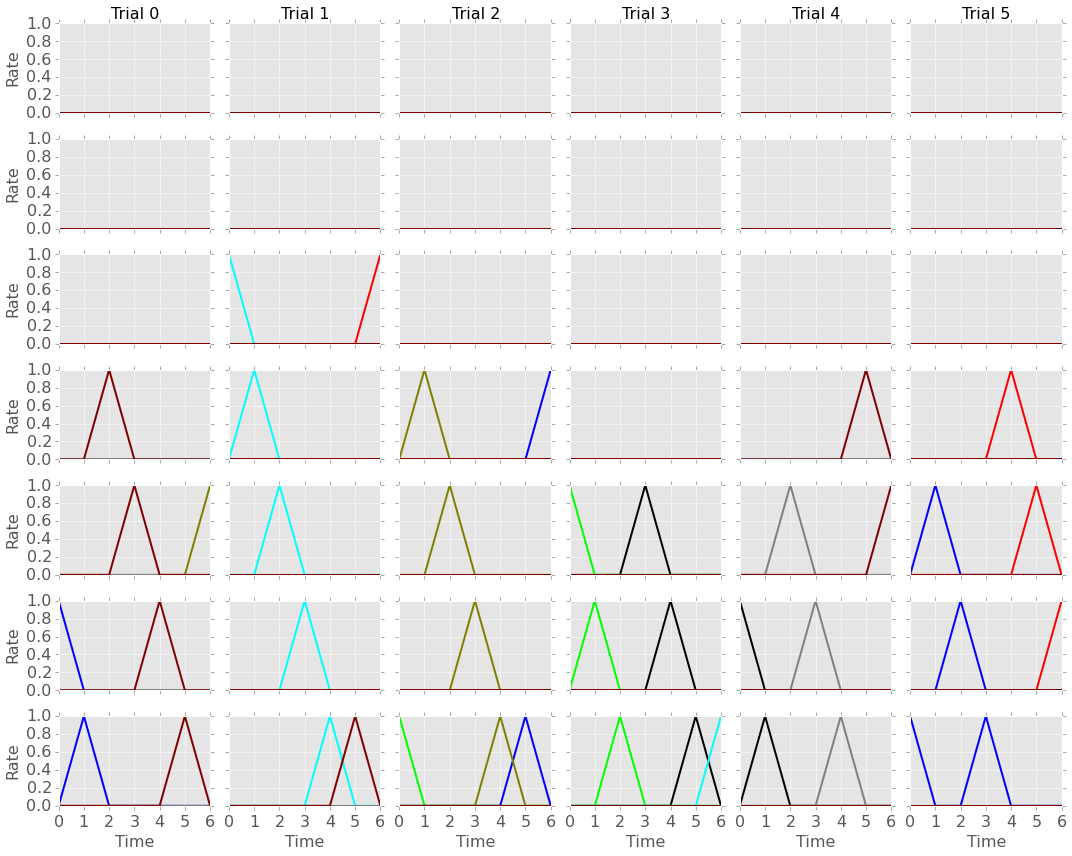

In [3]:
softmax_chains_spontaneous_and_driven.spontaneous(CONFIG_SPONTANEOUS)

As expected, segments of chains spontaneously activate and continue until the end of the chain.
#### Lower gain increases randomness
If the gain term is low, new chains of activation may start before the old chains have finished activating. This is because the lower the gain, the more equal the node activation probabilities.

In [4]:
CONFIG_SPONTANEOUS['GAIN'] = 2

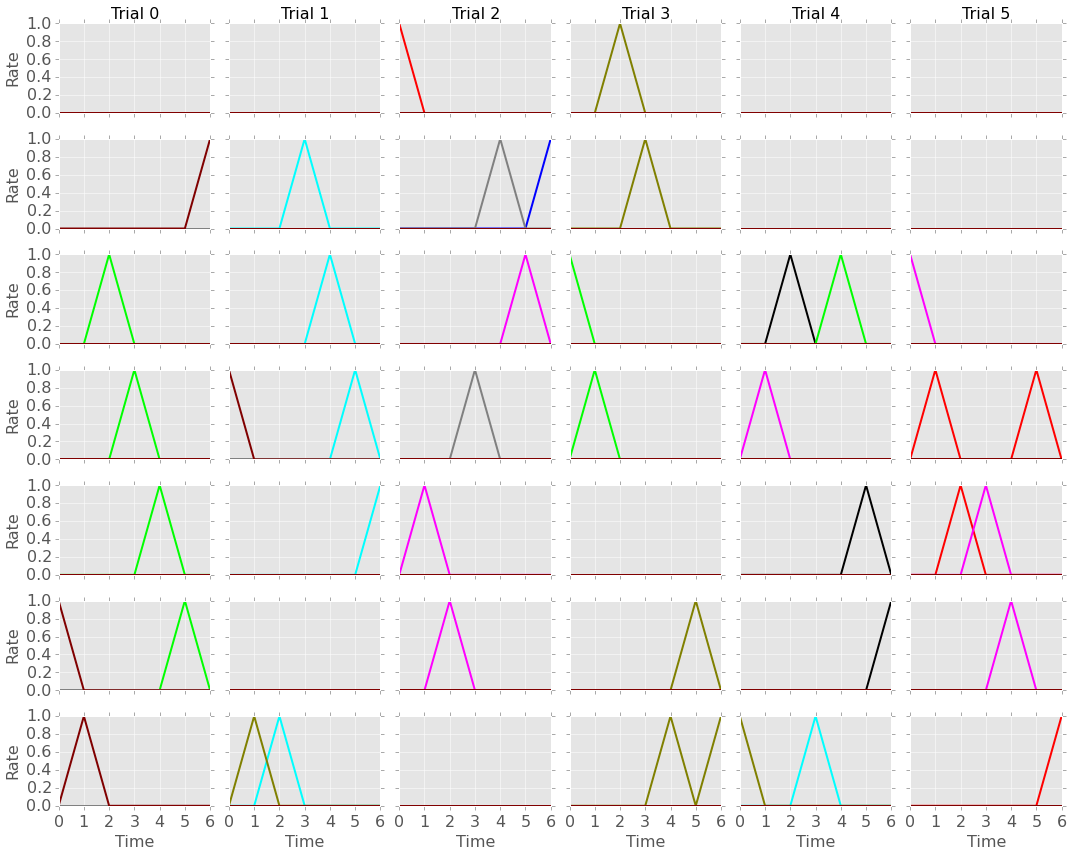

In [5]:
softmax_chains_spontaneous_and_driven.spontaneous(CONFIG_SPONTANEOUS)

As expected, we see more randomness in the activity patterns.

### Strong external drive
I now explore the relationship between driven activity and the priors encoded in the connectivity structure. External drive in the figures is shown in dotted lines, with its color/row indicating which node it is applied to.

In [12]:
CONFIG_DRIVEN = {
    'SEED': None,
    
    'N_CHAINS': 9,  # HOW MANY CHAINS
    'CHAIN_LENGTH': 7,  # HOW MANY NODES PER CHAIN
    
    'W_STRONG': 2,  # WEIGHT OF CONNECTIONS BETWEEN SUCCESSIVE NODES IN A CHAIN
    
    'GAIN': 6,  # GAIN TERM FOR WINNER TAKE ALL MECHANISM
    
    # WHICH NODES TO ACTIVATE WITH EXTERNAL DRIVE AND WHEN
    'DRIVE_NODE_COORDINATES': [
            [(chain_idx, chain_pos) for chain_pos in range(7)]  # DRIVE EACH CHAIN IN EXPECTED SEQUENCE
            for chain_idx in range(6)  # DRIVE A DIFFERENT CHAIN IN EACH TRIAL
        ],
    'DRIVE_AMPLITUDE': 3,  # STRENGTH OF DRIVE
    
    'N_TRIALS': 6,  # HOW MANY TRIALS
    
    'FIG_SIZE': (15, 12),
    'COLORS': [(0, 0, 0), (1, 0, 0), (0, 1, 0), (0, 0, 1), (0, 1, 1), (1, 0, 1), (.5, .5, 0), (.5, .5, .5), (.5, 0, 0)],
    'LW': 2,
    'FONT_SIZE': 16,
}

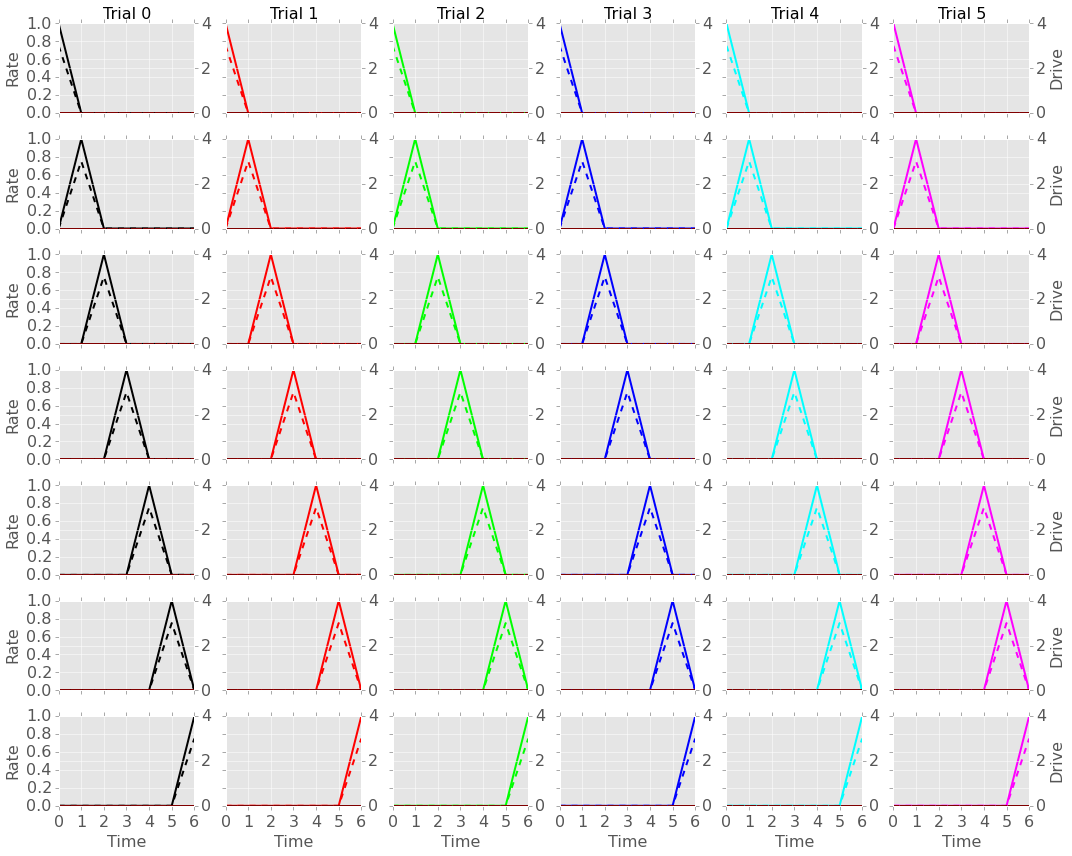

In [13]:
softmax_chains_spontaneous_and_driven.driven(CONFIG_DRIVEN)

We see here that we can recruit specific chains by applying strong external drive.

Below I show that one can drive any sequence of node activations, even if the sequence comprises more than one chain.

In [16]:
CONFIG_DRIVEN['DRIVE_NODE_COORDINATES'] = [
    [(0, 0), (0, 1), (0, 2), (1, 3), (1, 4), (1, 5), (1, 6)]
    for _ in range(6)
    ]

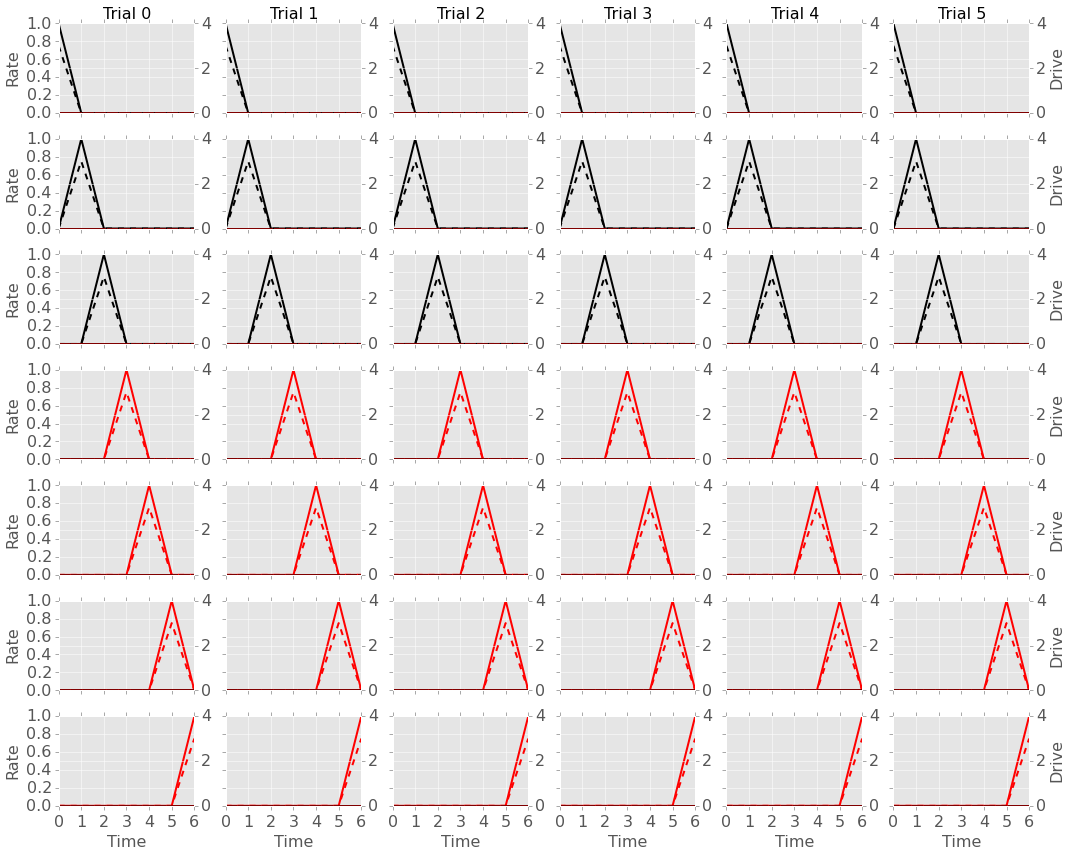

In [14]:
softmax_chains_spontaneous_and_driven.driven(CONFIG_DRIVEN)

Nothing too surprising here.

### Weak external drive
When external drive is weaker, competition emerges between the driven stimulus sequence and the internal prior sequences.

In [17]:
CONFIG_DRIVEN['DRIVE_AMPLITUDE'] = 2

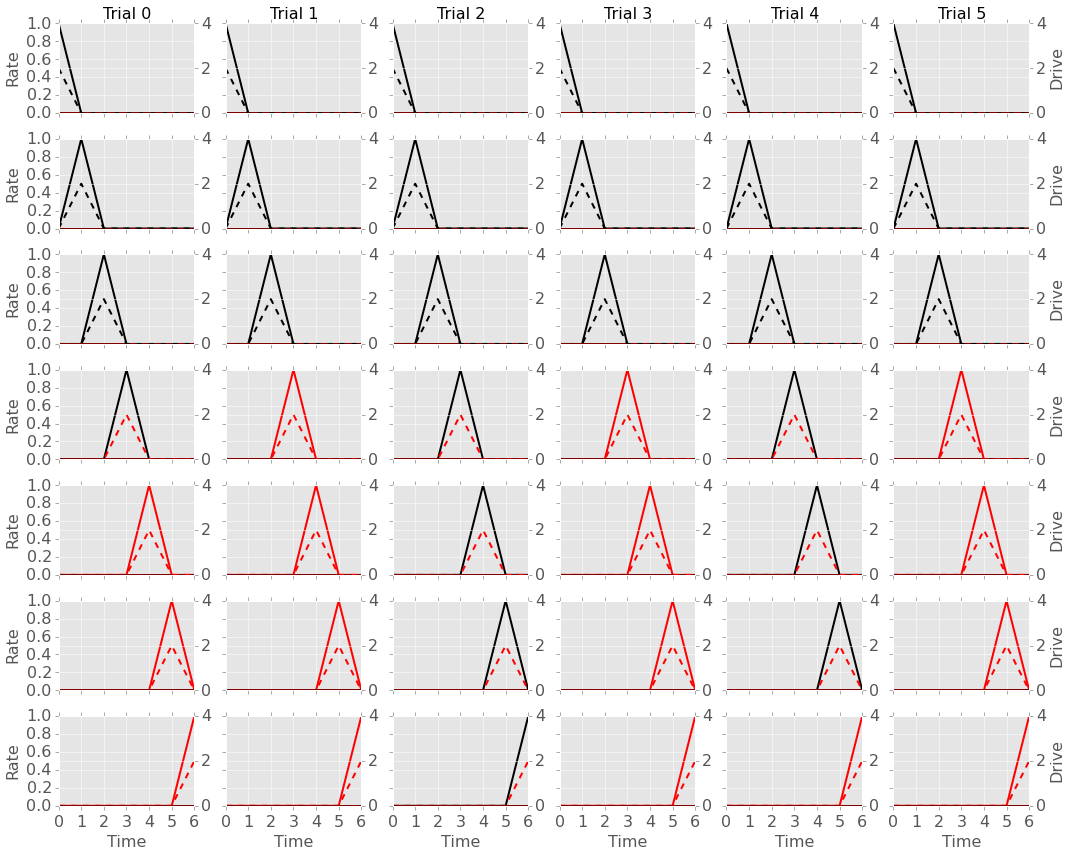

In [19]:
softmax_chains_spontaneous_and_driven.driven(CONFIG_DRIVEN)

Thus, if one chain/prior sequence is begun by an early external drive, later activation will not always follow the later external drive, but will sometimes corresponds to the completion of the sequence begun in the early stage. This effect becomes more exaggerated as the external drive amplitude decreases.

In [20]:
CONFIG_DRIVEN['DRIVE_AMPLITUDE'] = 1

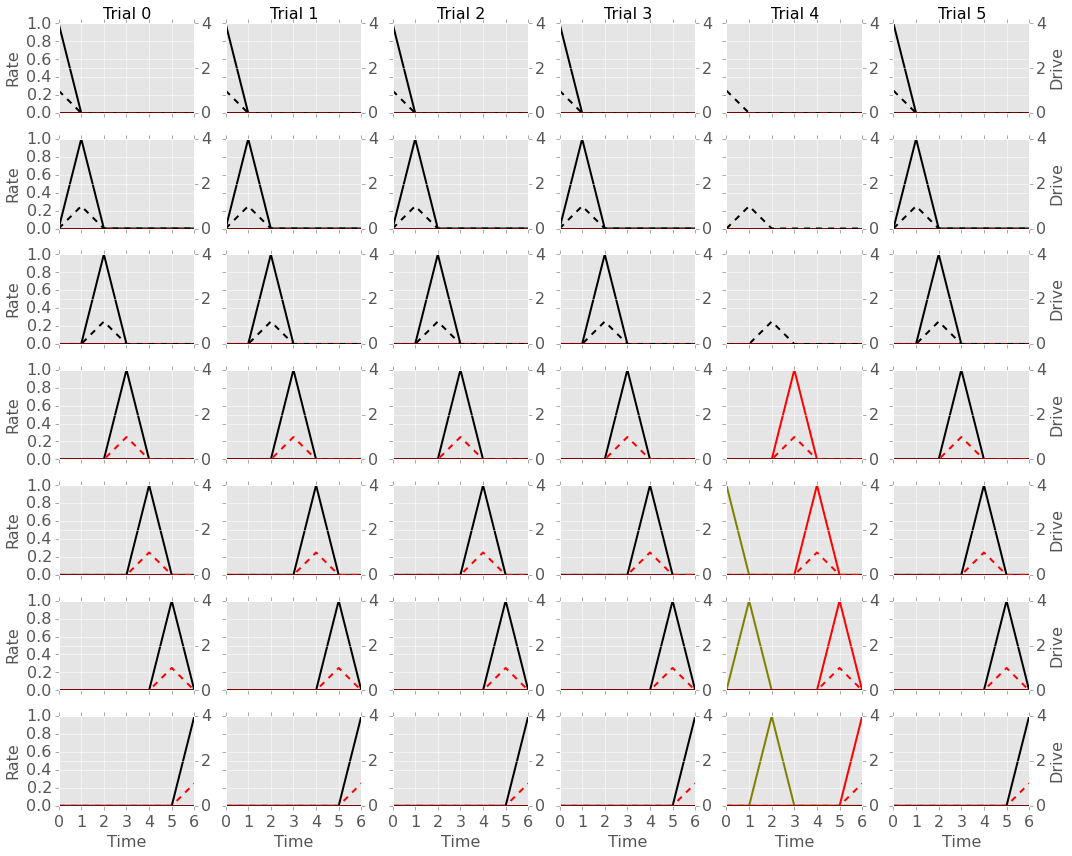

In [23]:
softmax_chains_spontaneous_and_driven.driven(CONFIG_DRIVEN)

As expected, while the external drive is strong enough to trigger a specific chain (most of the time), it is still too weak to cause the network to switch to another chain midway through the trial.

### Summary of part 1
I have developed a simple neural network that illustrates how priors activity patterns interact with patterns one attempts to elicit with external drive. The key observation here is that there is a competition between these two. When external drive is weak, prior patterns are more prevalent. When external drive is strong, activation patterns follow said external drive.

### [Go to part 2](softmax_chains_replay.ipynb)